In [48]:
# Import all necessary libraries.
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [49]:
N = 1000
np.random.seed(42)
x = np.sort(5 * np.random.rand(N, 1), axis=0)
y = np.sin(x).ravel()
y_orig = np.sin(x).ravel()

# Add noise to targets.
y += 0.1*np.random.randn(N)

# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [57]:
#k-NN
knc = KNeighborsRegressor()
# Set parameters for grid-search.
param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}]
clf = GridSearchCV(knc, param_grid, cv=5, verbose=3, n_jobs=-1)

clf.fit(x_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

y_pred = clf.predict(x_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.2s


{'n_neighbors': 20, 'weights': 'uniform'}
0.9796209553627315


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.5s finished


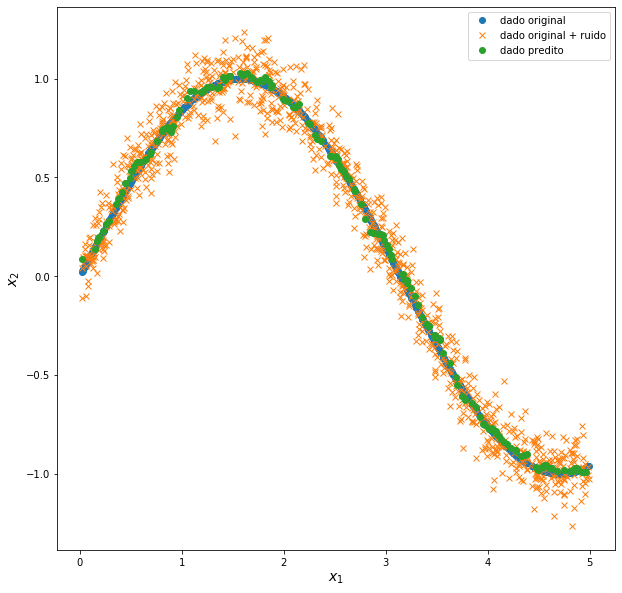

In [58]:
fig = plt.figure(figsize=(10,10))
plt.plot(x, y_orig, 'o', label = 'dado original') 
plt.plot(x, y, 'x', label = 'dado original + ruido')
plt.plot(x_test, y_pred, 'o', label = 'dado predito')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.show()

In [59]:
M = len(y_test)
Joptimum = (1/M)*np.sum(np.power((y_test - y_pred), 2))
print('O erro quadrático médio (MSE) para o conjunto de validação/teste é: ' + str(Joptimum))

O erro quadrático médio (MSE) para o conjunto de validação/teste é: 0.010674967098626783
